Populating the interactive namespace from numpy and matplotlib


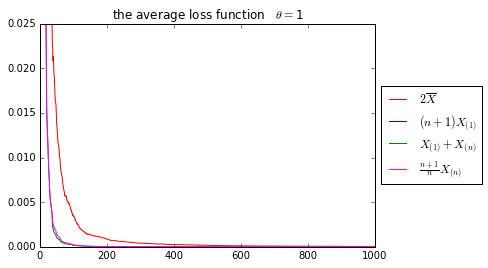

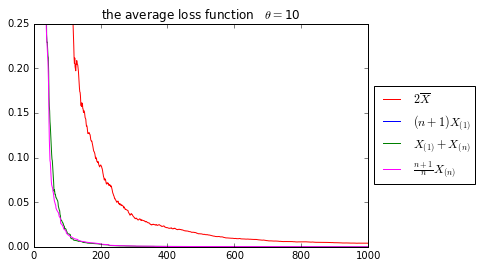

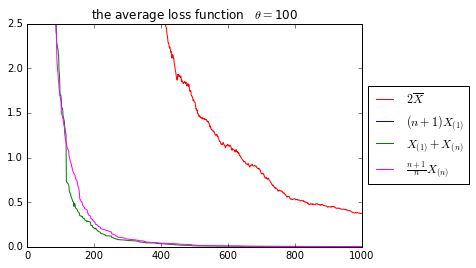

In [1]:
%pylab inline

import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

def func(theta):
    samples = np.zeros(100000).reshape(100, 1000)
    est1 = np.zeros(100000).reshape(100, 1000)
    est2 = np.zeros(100000).reshape(100, 1000)
    est3 = np.zeros(100000).reshape(100, 1000)
    est4 = np.zeros(100000).reshape(100, 1000)
    
    for i in range(100):
        samples[i] = sps.uniform.rvs(size=1000, loc=0, scale=theta)
        est1[i] = (2 * samples[i].cumsum() / np.arange(1, 1001) - theta) ** 2
        
        min_ar = np.zeros(1000)
        min_ar[0] = samples[i][0]
        max_ar = np.zeros(1000)
        max_ar[0] = samples[i][0]
        for n in range(1, 1000):
            min_ar[n] = min(min_ar[n - 1], samples[i][n])
            max_ar[n] = max(max_ar[n - 1], samples[i][n])
            
        est2[i] = ((np.arange(1, 1001) + 1) * min_ar - theta) ** 2
        est3[i] = (min_ar + max_ar - theta) ** 2
        est4[i] = ((1 + np.arange(1, 1001) ** (-1)) * max_ar - theta) ** 2
    
    est1_av = est1.sum(axis=0) / np.arange(1, 1001)
    est2_av = est2.sum(axis=0) / np.arange(1, 1001)
    est3_av = est3.sum(axis=0) / np.arange(1, 1001)
    est4_av = est4.sum(axis=0) / np.arange(1, 1001)
    
    plt.ylim((0, theta * 0.025))
    plt.title('the average loss function   ' + r'$\theta=$' + str(theta))
    plt.plot(np.arange(1, 1001), est1_av, color='red', label='$2\overline{X}$')
    plt.plot(np.arange(1, 1001), est2_av, color='blue', label='$(n+1)X_{(1)}$')
    plt.plot(np.arange(1, 1001), est3_av, color='green', label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.arange(1, 1001), est4_av, color='magenta', label=r'$\frac{n+1}{n} X_{(n)}$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
func(1)
func(10)
func(100)

            